In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
naive = xr.open_dataset("/glade/scratch/zhonghua/urban_2d/naive.nc") # based on lndtype=9
ds = xr.open_dataset("/glade/scratch/zhonghua/urban_2d/full.nc").sel(lndtype=9).sel(time=naive.time)

timestamp: 0


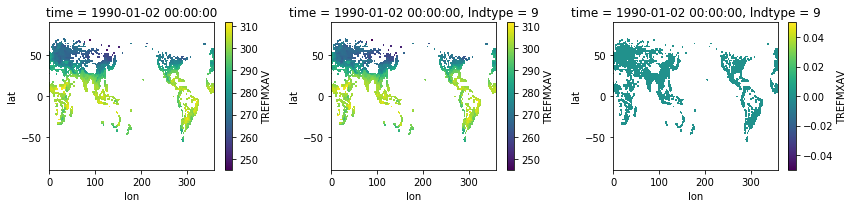

Pass the test!
################

timestamp: 66


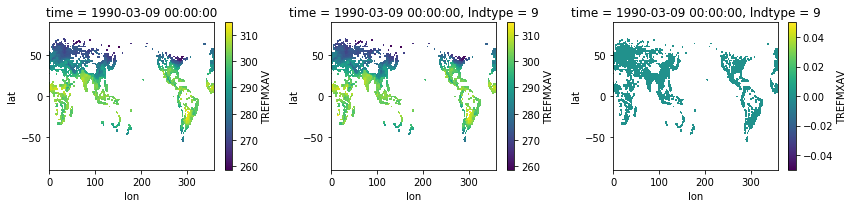

Pass the test!
################

timestamp: 88


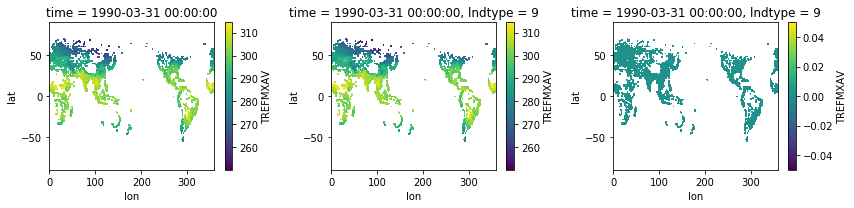

Pass the test!
################



In [3]:
var = "TREFMXAV"

for time_idx in [0,66,88]:
    print("timestamp:",time_idx)
    fig = plt.figure(figsize=(12,3))
    # lndtype = 7
    ax = fig.add_subplot(131)
    naive.sel(time=naive.time[time_idx])[var].plot()
    # lndtype = 8
    ax = fig.add_subplot(132)
    ds.sel(time=naive.time[time_idx])[var].plot()
    # lndtype = 9
    ax = fig.add_subplot(133)
    (naive.sel(time=naive.time[time_idx])[var] - ds.sel(time=naive.time[time_idx])[var]).plot()
    plt.tight_layout()
    plt.show()
    
    # Raises an AssertionError if two array_like objects are not equal.
    # https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_array_equal.html
    naive_arr = naive.sel(time=naive.time[time_idx])[var].values
    ds_arr = ds.sel(time=naive.time[time_idx])[var].values
    np.testing.assert_array_equal(naive_arr, ds_arr)
    print("Pass the test!")
    
    print("################\n")